# Программирование на языке Python
## Семинар 26. Проверка гипотез: краткий обзор
### Содержание
![](images/all.png)

### Пререквизиты
![](images/e_disp.png)

![](images/continuity.png)

### Проверка гипотез? Зачем?
**Общий смысл**

- видим в данных какую-то закономерность
- думаем, как ее измерить
- насколько вероятно получить такое случайно?
- для ответа требуется: 1) понять, какие вообще результаты получаются случайно и 2) проверить, как соотносится с этим распределением полученное нами значение
- если укладывается - закономерность случайна, нет - отвергаем случайность закономерности

**Формализация**

1. Выдвигаем H0 (нулевая гипотеза) о том, что все случайно (Ha - альтернативная гипотеза - будет противоположна H0);
2. Выбираем статистику критерия (исходя из задачи и типа закономерности). Можем хоть сами придумать, главное чтобы она работала (вопрос: а как проверить что она работает?);
3. Подсчитываем наблюдаемую статистику критерия;
4. Подсчитываем вероятность получить ее по случайным причинам;
5. Оцениваем вероятность и делаем вывод.

**Что хотим получить и чего хотели бы избежать?**

![](https://i.redd.it/ob8za0yst6f21.png)


### Сравнение выборки с заданным распределением
#### t-тест и z-тест для одной выборки

![](https://i.ytimg.com/vi/PUm3oq2lQWs/maxresdefault.jpg)

In [8]:
import numpy as np
from scipy import stats

n = 20

sample = np.random.uniform(-9, 4, n)
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)

In [9]:
sample_mean

-1.6391442312054907

In [4]:
population_mean = -3

# H0:            sample_mean = population_mean (sample_mean - population_mean = 0)

# HA-left:       sample_mean < population_mean
# HA-right:      sample_mean > population_mean
# HA-two-sided:  sample_mean != population_mean +++++++++++++

In [ ]:
# применяем к метрике которую проверяем некоторые преобразования
# цель - получить универсальную статистику (она имеет хорошо изученное распределение при верной H0)

# (вариация == дисперсия == variation)

In [15]:
# считаем статистику (реальное значение)
statistic = (sample_mean - population_mean) / (sample_std / n ** (1 / 2))

degrees_of_freedom = n - 1

statistic  # какое место оно занимает в теоретическом распределении?

1.678643593763355

In [12]:
# при верной H0 statistic ~ t-распределение (df = n - 1)
# насколько наблюдаемое значение вписывается в это распределение?
# для меры этого придумали т. н. p-value
# p-value - это вероятность (при верной H0) получить такое же или более ЭКСТРЕМАЛЬНОЕ значение
# ИЛИ это вероятность отвергнуть верную H0
# ИЛИ это вероятность ошибки первого рода

In [19]:
# тестируем против ПРАВОСТОРОННЕЙ АЛЬТЕРНАТИВЫ
# HA-right:      sample_mean > population_mean

# рассчитаем p-value:
# 1 - F(statistic) = 1 - P(t <= statistic)

t_distribution = stats.t(df=degrees_of_freedom)

1 - t_distribution.cdf(statistic)  # p-value

# p-value большое -> значит проверяемое следствие из нулевой гипотезы очень вероятно получить
# p-value маленькое -> значит проверяемое следствие из нулевой гипотезы получить маловероятно -> нулевая гипотеза должна быть отвергнута
# конвенциональный порог - 0.05

# нулевая гипотеза ПРОТИВ ПРАВОСТОРОННЕЙ АЛЬТЕРНАТИВЫ не отвергается

0.05479657244191982

In [20]:
# тестируем против ЛЕВОСТОРОННЕЙ АЛЬТЕРНАТИВЫ
# HA-left:      sample_mean < population_mean

t_distribution.cdf(statistic)  # p-value

# нулевая гипотеза ПРОТИВ ЛЕВОСТОРОННЕЙ АЛЬТЕРНАТИВЫ не отвергается

0.9452034275580802

In [21]:
# тестируем против ДВУХСТОРОННЕЙ АЛЬТЕРНАТИВЫ
# HA-two-sided:  sample_mean != population_mean

t_distribution.cdf(-statistic) * 2  # p-value

# нулевая гипотеза ПРОТИВ ДВУХСТОРОННЕЙ АЛЬТЕРНАТИВЫ не отвергается

0.10959314488383952

In [23]:
# scipy

stats.ttest_1samp(sample, -3)

TtestResult(statistic=1.678643593763355, pvalue=0.10959314488383952, df=19)

In [27]:
stats.ttest_1samp(sample, -3, alternative='greater')

TtestResult(statistic=1.678643593763355, pvalue=0.05479657244191976, df=19)

In [28]:
stats.ttest_1samp(sample, -3, alternative='less')

TtestResult(statistic=1.678643593763355, pvalue=0.9452034275580802, df=19)

In [ ]:
# при (n -> Inf) t-distribution -> N(0, 1), Z
# n > 100

#### О важности степеней свободы

In [1]:
from scipy import stats

In [2]:
population = np.random.normal(5, 7, 100000)

In [17]:
popmean = population.mean()
popvar = population.var()
popmean

5.0336065388829585

In [13]:
def generate_sample_means(population, sample_size, n_samples=1000):
    sample_means = []

    for _ in range(n_samples):
        sample_i = np.random.choice(population, sample_size)
        sample_mean = sample_i.mean()
    
        sample_means.append(sample_mean)


    return sample_means

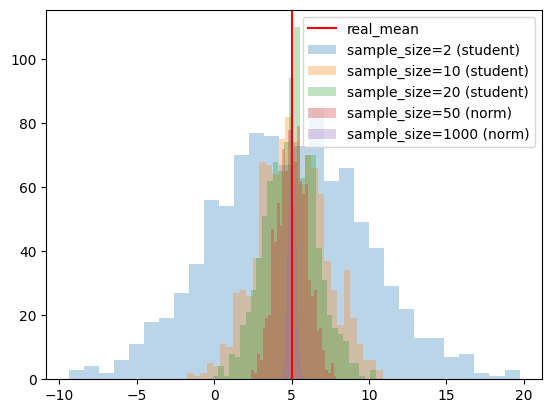

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.axvline(popmean, color='red', label='real_mean')

sample_sizes = [2, 10, 20, 50, 1000]

for sample_size in sample_sizes:
    sample_means = generate_sample_means(population, sample_size)

    if sample_size < 50:
        dist = 'student'
    else:
        dist = 'norm'
    
    ax.hist(sample_means, bins=30, alpha=.3, label=f'sample_size={sample_size} ({dist})')
    
    ax.legend();

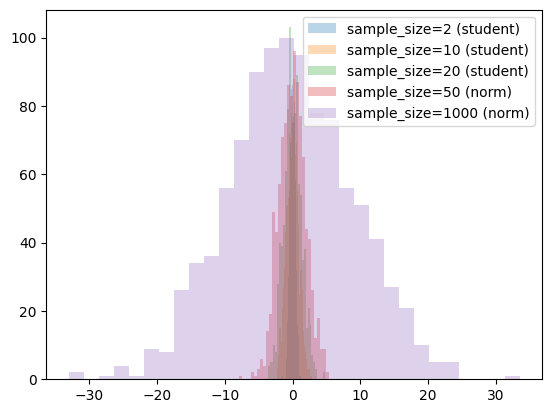

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax.axvline(popmean, color='red', label='real_mean')

sample_sizes = [2, 10, 20, 50, 1000]

for sample_size in sample_sizes:
    sample_means = generate_sample_means(population, sample_size)

    if sample_size < 50:
        dist = 'student'
    else:
        dist = 'norm'

    sample_means = (sample_means - popmean) / (popvar / sample_size ** 1 / 2) 
    
    ax.hist(sample_means, bins=30, alpha=.3, label=f'sample_size={sample_size} ({dist})')
    
    ax.legend();

$E(\mu_X)=E(X)$, n -> Inf

$E(\mu_X) \sim N(E(X), Var(X) / \sqrt(n))$ (sample_size -> Inf)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

data = pd.read_excel('ess_data.xlsx')
data.info()

norway_data = data[data['cntry'] == 'Norway'].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35987 entries, 0 to 35986
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     35987 non-null  object
 1   netusoft  35987 non-null  object
 2   ppltrst   35987 non-null  int64 
 3   clsprty   35987 non-null  object
 4   rlgatnd   35987 non-null  object
 5   gndr      35987 non-null  object
 6   agea      35987 non-null  int64 
 7   tporgwk   35987 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


$H_0: \mu_x=a$ <br>
$H_A: \mu_x \neq a$ <br>
$\mu$ - mean <br>
$a$ - some value

Допущения:
- X (здесь и далее X - генеральная совокупность) имеет нормальное распределение
- применяется только к т. н. numeric переменным

Если на показатель влияет большое количество мелких разнонаправленных факторов, показатель скорее всего распределен нормально (биологические показатели: рост, вес и т. д.). На самом деле есть тест на проверку того, что выборка пришла из нормального распределения.

In [3]:
age_norway = data.loc[data['cntry'] == 'Norway', 'agea'].copy()

In [6]:
age_norway_mean = age_norway.mean()
age_norway_std = age_norway.std(ddof=1)
age_norway_size = age_norway.size
age_norway_mean

47.229046242774565

In [ ]:
#H0: возраст на самом деле 40
#HA: возраст на самом деле не 40

In [7]:
# считаем статистику (реальное значение)
statistic = (age_norway_mean - 40) / (age_norway_std / age_norway_size ** (1 / 2))

# degrees_of_freedom = n - 1 -> не надо, т. к. Z-тест

statistic  # какое место оно занимает в теоретическом распределении?

14.786143270569728

In [9]:
norm_distribution = stats.norm(0, 1)
norm_distribution.cdf(-statistic) * 2  # p-value

# h0 отвергнута -> можно считать, что жители Норвегии на самом деле не могут быть в среднем сорокалетними

1.7997513933815474e-49

In [24]:
stats.ttest_1samp(age_norway, 40)

TtestResult(statistic=14.786143270569728, pvalue=4.849408790456409e-46, df=1383)

**Задача.** При каких значениях теоретического возраста мы бы не стали отвергать H0 (при условии, что пороговый p-value 0.05, и при двусторонней альтернативе)?

In [ ]:
Q - квантиль

1) p-value >= 0.05

2)
p-value = P(Z >= statistic) + P(Z <= -statistic), statistic >= 0
p-value = F(-statistic) * 2, statistic >= 0

3)
F(-statistic) * 2 >= 0.05, statistic >= 0
F(-statistic) >= 0.025, statistic >= 0
F(-statistic) == 0.025, statistic >= 0
-statistic = Q(0.025)
statistic = Q(0.975)



3)
statistic = (age_norway_mean - theoretic_mean) / (age_norway_std / age_norway_size ** (1 / 2))
(age_norway_mean - theoretic_mean) = statistic * (age_norway_std / age_norway_size ** (1 / 2))

theoretic_mean = age_norway_mean - statistic * (age_norway_std / age_norway_size ** (1 / 2))

theoretic_mean1 = age_norway_mean - statistic * (age_norway_std / age_norway_size ** (1 / 2))
theoretic_mean2 = age_norway_mean + statistic * (age_norway_std / age_norway_size ** (1 / 2))

theoretic_mean1 = age_norway_mean - Q(0.025) * (age_norway_std / age_norway_size ** (1 / 2))
theoretic_mean2 = age_norway_mean + Q(0.975) * (age_norway_std / age_norway_size ** (1 / 2))

theoretic_mean1 < age_norway_mean < theoretic_mean2

In [ ]:
Q(0.025) = norm_distribution.ppf(0.025)
Q(0.975) = norm_distribution.ppf(0.975)

In [11]:
norm_distribution.ppf(0.025)

-1.9599639845400545

In [12]:
(
    age_norway_mean + norm_distribution.ppf(0.025) * (age_norway_std / age_norway_size ** (1 / 2)),
    age_norway_mean,
    age_norway_mean + norm_distribution.ppf(0.975) * (age_norway_std / age_norway_size ** (1 / 2)),
)
# то теоретическое значение, которое войдет в этот интервал, не повлечет отвержение H0 (при двусторонней альтернативе и пороге p-value=0.05)

(46.27080648957171, 47.229046242774565, 48.18728599597742)

### Парные наблюдения
#### Парный t-test

$H_0: \mu_{after}=\mu_{before}$ <br>
$H_A: \mu_{after} \neq \mu_{before}$ <br>
$\mu$ - mean <br>

Допущения:

- X (здесь и далее X - генеральная совокупность) имеет нормальное распределение
- обе выборки представляют собой измерения одних и тех же объектов

In [ ]:
# TREATMENT
#  T1   T2   DIFF
# 2.7   2.9  0.2
# 3.2   3.0  -0.2
# 4.1   4.5  0.4
# 2.9   3.2  0.3

In [ ]:
# далее сравниваем mean(DIFF) с 0 -> одновыборочный t-test, где DIFF - выборка, а теоретическое среднее - 0

In [17]:
diff = np.array([0.2, -0.2, 0.4, 0.3])

diff_mean = diff.mean()
diff_std = diff.std(ddof=1)
n = diff.size

theoretic_diff = 0

df = n - 1

statistic = (diff_mean - theoretic_diff) / (diff_std / n ** (1 / 2))
statistic

1.3308209261014035

In [18]:
t_distrib = stats.t(df)

In [19]:
t_distrib.cdf(-statistic) * 2  # p-value

0.27535418453911603

In [ ]:
# CONTROL
#  T1   T2
# 2.7   ...
# 3.2   ...
# 4.1   ...
# 2.9   ...

#### Критерий знаков

![](https://slideplayer.com/slide/6959440/24/images/4/Bernoulli+Distribution.jpg)

![](https://slideplayer.com/slide/5269821/17/images/24/Binomial+Distribution+Formula.jpg)

![](https://slideplayer.com/slide/17819162/106/images/60/4-7+Normal+Approximation+to+the+Binomial+and+Poisson+Distributions.jpg)

$H_0: median_x = median_y$ <br>
$H_A: median_x \neq median_y$ <br>

Допущения:

- обе выборки представляют собой измерения одних и тех же объектов

In [ ]:
# Bernoulli
# - E(X) = p
# - Var(X) = p * (1 - p)

# Binomial
# - E(X) = n * p
# - Var(X) = n * p * (1 - p)

In [ ]:
#  T1   T2   IS_SUCCESS (T2 > T1)
# 2.7   2.9     1
# 3.2   3.0     0
# 4.1   4.5     1
# 2.9   3.2     1

In [8]:
statistic = 3  # число успехов

In [12]:
# binom
n = 4
p = 0.5

In [ ]:
# все исходы:
# 0, 1, 2, 3, 4

# E(X) = 2

In [ ]:
# что такое такое же или более экстремальное?
# в большую сторону: 0, 1, 2, [3, 4]
# в меньшую сторону: [0, 1], 2, 3, 4
# в обе:             [0, 1], 2, [3, 4]

In [13]:
binom_distrib = stats.binom(n, p)

In [14]:
1 - binom_distrib.pmf(2)  # p-value (при двусторонней альтернативе)

0.6249999999999998

А есть вообще при таких условиях возожность хотя бы теоретически отвергнуть H0 (при пороге p-value = 0.05)?

In [15]:
# а какое вообще самое маленькое p-value можно тут получить? Будет ли оно меньше 0.05?

binom_distrib.pmf([0, 4]).sum()  # самое маленькое p-value, которое мы можем получить

0.125

In [17]:
stats.binom(5, 0.5).pmf([0, 5]).sum()

0.062499999999999986

**Задача.** Чтобы сдать экзамен, Николаю надо ответить правильно по крайней мере на 3 вопроса из 6. В каждом вопросе 4 варианта ответов (при единственно верном). Какова вероятность, что Николай сможет сдать экзамен не готовясь?

In [9]:
n = 6  # количество попыток
p = 0.25  # вероятность успехов

# надо посчитать суммарную вероятность 3, 4, 5 и 6 успехов
binom_distrib = stats.binom(n, p)

In [10]:
binom_distrib.pmf([3, 4, 5, 6]).sum()

0.1694335937499999

In [11]:
binom_distrib.pmf(0)

0.17797851562499994

#### Парный критерий Уилкоксона

$H_0: median_x = median_y$ <br>
$H_A: median_x \neq median_y$ <br>

Допущения:

- обе выборки представляют собой измерения одних и тех же объектов
- значения разности более должы быть вариативны (т. е. не -1/0/1: для таких случаев лучше критерий знаков)
- n >= 5. При этом случаи, когда разность равна 0, исключаются из подсчета статистики

Подробнее см. [тут](https://medstatistic.ru/methods/methods3.html).

In [ ]:
#  T1   T2   DIFF  RANK
# 2.7   2.9  0.2    1
# 3.2   3.0  -0.2   0
# 4.1   4.5  0.4    3
# 2.9   3.2  0.3    2

In [18]:
t1 = [2.7, 3.2, 4.1, 2.9]
t2 = [2.9, 3.0, 4.5, 3.2]

In [19]:
stats.ttest_rel(
    t1,
    t2,
    alternative='two-sided'
)

TtestResult(statistic=-1.3308209261014028, pvalue=0.2753541845391162, df=3)

In [20]:
stats.wilcoxon(
    t1,
    t2,
    alternative='two-sided'
)

WilcoxonResult(statistic=2.0, pvalue=0.375)

In [ ]:
# p-value
# критерий знаков: 0.62
# парный t-test:   0.28
# wilcoxon:        0.375

### Сравнение двух выборок
#### Двухвыборочный t-test (не путать с парным)
![](https://cdn1.qualitygurus.com/wp-content/uploads/2022/12/Two-sample-t-test-formulas.png?lossy=1&ssl=1)

$H_0: \mu_x = \mu_y$ <br>
$H_A: \mu_x \neq \mu_y$ <br>

Допущения:

- X и Y имеют нормальное распределение

**Как вы думаете, что будет, если вместо этого теста использовать парный критерий?**

In [3]:
age_male = data.loc[(data['cntry'] == 'Norway') & (data['gndr'] == 'Male'), 'agea'].values
age_female = data.loc[(data['cntry'] == 'Norway') & (data['gndr'] == 'Female'), 'agea'].values

In [22]:
age_male.mean(), age_female.mean()

(47.77574047954866, 46.65481481481481)

In [33]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=False
)

TtestResult(statistic=1.1473481001455839, pvalue=0.2514363738928764, df=1381.943195299341)

#### F-тест о равенстве дисперсий
Имеется и непараметрический вариант: Levene test.
![](https://image.slideserve.com/963492/f-test-example-solution1-l.jpg)

Допущения:

- X и Y имеют нормальное распределение

In [ ]:
# только односторонняя альтернатива

In [25]:
def f_test(sample1, sample2):
    var1 = sample1.var(ddof=1)
    var2 = sample2.var(ddof=1)

    if var1 >= var2:
        statistic = var1 / var2
    else:
        statistic = var2 / var1

    df1 = sample1.size - 1
    df2 = sample2.size - 1

    f_distrib = stats.f(df1, df2)

    p_value = 1 - f_distrib.cdf(statistic)

    return statistic, p_value

In [26]:
# проверим, имеем ли мы основание поставить True ниже в equal_var
f_test(
    age_male,
    age_female
)  # H0 о равенстве дисперсий не отвергаем, можно ставить True

(1.0892965881947765, 0.13087787094441605)

In [27]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=True
)

TtestResult(statistic=1.1461431790107866, pvalue=0.2519343265853811, df=1382.0)

In [28]:
stats.levene(
    age_male,
    age_female
)

LeveneResult(statistic=2.173100611732319, pvalue=0.1406705603208207)

#### Критерии Уилкоксона и Манна-Уитни
![](images/wilcox.png)
![](images/mann_whitney.png)

In [96]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=False
)

TtestResult(statistic=1.1473481001455839, pvalue=0.2514363738928764, df=1381.943195299341)

In [97]:
stats.mannwhitneyu(
    age_male,
    age_female,
    alternative='two-sided',
)

MannwhitneyuResult(statistic=247264.0, pvalue=0.28312057544024005)

#### Критерий Колмогорова-Смирнова

In [98]:
# возраст мужчин и женщин имеет равную дисперсию и средние. Может, эти две выборки пришли из одной и той же генеральной совокупности?

# H0: из одного распределения
# Ha: не из одного распределения
stats.kstest(
    age_male,
    age_female
)  # H0 нет оснований отвергнуть

# исходя из всех проведенных тестов можно сказать, что возраст мужчин и женщин в Норвегии (на текущих данные) не отличается

KstestResult(statistic=0.051210364101760435, pvalue=0.3100250775915103, statistic_location=65, statistic_sign=-1)

### Сравнение многих выборок
#### ANOVA (он же однофакторный дисперсионный анализ)
![](https://i.pinimg.com/originals/eb/94/f9/eb94f9bae12be2d6617549bd22e7d216.jpg)

![](./images/anova.png)

$H_0: \mu_{x_1} = \mu_{x_2} = ... = \mu_{x_n}, X \sim N(\mu, \delta)$<br>
$H_A: \mu_{x_1} \neq \mu_{x_2} \neq ... \neq \mu_{x_n}, X \sim N(_, \delta)$

**Допущения.**
1. Количественный непрерывный тип данных, дискретные данные менее желательны.
2. Независимые между собой выборки.
3. Нормальное распределение признака в генеральных совокупностях, из которых извлечены выборки.
4. Равенство (гомогенность) дисперсий изучаемого признака в генеральных совокупностях, из которых извлечены выборки.
5. Независимые наблюдения в каждой из выборок.

**Вопрос.** Отличается ли вообще возраст во всех представленных в данных странах?

In [5]:
data.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Belgium,Every day,6,No,Once a week,Female,16,Not applicable
1,Belgium,Every day,3,No,Never,Female,24,A private firm
2,Belgium,Every day,6,Yes,Never,Male,58,A private firm
3,Belgium,Every day,7,No,Never,Male,35,Other
4,Belgium,Every day,3,No,Never,Male,61,Other public sector (such as education and hea...


In [101]:
Xij = [series.values for group, series in data.groupby('cntry')['agea']]

In [100]:
# считаем средние
mu = data['agea'].values.mean()
mu_i = data.groupby('cntry')['agea'].mean().values
mu, mu_i

(50.8717870342068,
 array([49.02108434, 52.68146718, 50.17905405, 48.23954849, 51.68149117,
        52.66921606, 49.55856325, 50.30888469, 50.60982659, 50.24376417,
        53.56975381, 51.63011998, 51.30304956, 47.50043066, 48.67545076,
        51.55855856, 47.22904624, 53.8661773 , 53.13083397, 49.35515548,
        49.66825613, 55.71855761]))

In [104]:
s2_0 = np.concatenate([(xij - mui) ** 2 for xij, mui in zip(Xij, mu_i)]).sum() / (data.groupby('cntry').size().sum() - data['cntry'].nunique())

In [108]:
s2_1 = (data.groupby('cntry').size().values * (mu_i - mu) ** 2).sum() / (mu_i.size - 1)

In [109]:
s2_1 / s2_0

21.134386131194912

In [110]:
stats.f_oneway(*Xij)  # H0 отвергается

F_onewayResult(statistic=21.134386131194894, pvalue=2.623811625933467e-80)

#### Kruskal Wallis Test (критерий Краскелла-Уоллиса)
Минус допущение о нормальности генеральных совокупностей. Однако, этот критерий служит только для проверки сдвига!

In [111]:
stats.kruskal(*Xij)  # H0 отвергается

KruskalResult(statistic=422.81394650307897, pvalue=1.7429411866934363e-76)

#### Бонус: поправка на множественное сравнение
**Задача 1.** Представим, что нам надо сравнить среднюю ожидаемую продолжительность жизни в 10 регионах РФ. Сколько попарных сравнений нам надо сделать?

In [7]:
np.arange(1, 10).sum()

45

**Задача 2.** Пусть порог p-value для этих тестирований будет равен 0.05. Какая вероятность при этом пороге ни разу не совершить ошибку 1 рода за все 45 тестирований?

In [14]:
# имеем 45 попыток. "Успех" - совершение ошибки 1 рода. Вероятность успеха - 0.05. Это биномиальные
n = 45
p = 0.05

# надо посчитать вероятность ни разу не ошибиться -> P(X = 0)

binom_distrib = stats.binom(n, p)
binom_distrib.pmf(0)

0.09944025698709248

In [15]:
1 - binom_distrib.pmf(0)  # но мы-то хотели 0.05!

0.9005597430129075

In [17]:
binom_distrib.pmf(1), n * p

(0.23551639812732422, 2.25)

**Задача 3.** Найти такое значение порога p-value (для i-го тестирования), что вероятность хоть раз совершить ошибку 1 рода будет 0.05 (как и задумывалось изначально).

In [19]:
p_current = p
prob_not_mistake = stats.binom(n, p_current).pmf(0)

while prob_not_mistake <= 0.95:
    p_current += -1e-4
    prob_not_mistake = stats.binom(n, p_current).pmf(0)

In [20]:
p_current  # новое пороговое значение (такое значение эквивалентно порогу 0.05 при n=1)

0.0010999999999996015

In [21]:
# поправка Bonferroni
p / n

0.0011111111111111111

### Сравнение выборки с заданным распределением
#### Полиномиальный тест

#### Критерий согласия Chi-squared
![](https://cf2.ppt-online.org/files2/slide/p/p1fDJoE9zLG0R5OgWv4PtcSihTYa2unFX6qwdm8QVU/slide-38.jpg)

Критерий согласия хи-квадрат применим, только если ожидаемое значение в каждой ячейке больше 5, а общее количество объектов не менее 20.

**Задача.** Есть 5 магазинов. В каждом из них за день продано определенное количество товара. Надо проверить, есть ли разница между магазинам в продажах?

In [112]:
# H0: значения пришли из одного дискретного распределения
# Ha: !H0

sales = np.array([60, 54, 32, 43, 71])

sales_mean = sales.mean()

statistic = (((sales - sales_mean) ** 2) / sales_mean).sum()
statistic

17.5

In [113]:
chi2_distrib = stats.chi2(df=sales.size - 1)

In [114]:
1 - chi2_distrib.cdf(statistic)  # p-value

0.0015449979198786101

**Задача.** Есть ли значимые отличия в количестве респондентов в разных странах?

In [117]:
respondents_counts = data.groupby('cntry').size().values

mean = respondents_counts.mean()

statistic = (((respondents_counts - mean) ** 2) / mean).sum()
statistic

2999.450829466196

#### Критерий Колмогорова
Проверка совпадения распределений генеральной совокупностей двух выборок:

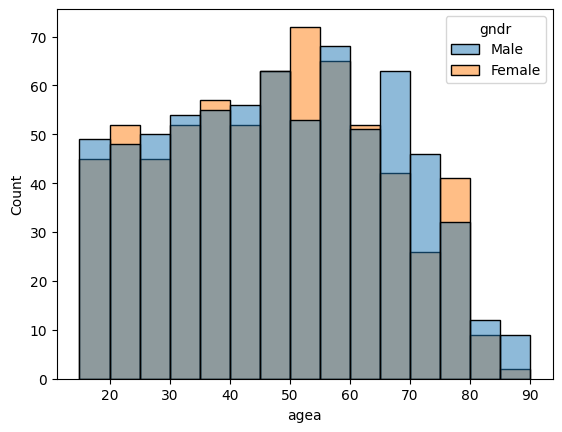

In [5]:
import seaborn as sns

sns.histplot(data=data[data['cntry'] == 'Norway'], x='agea', hue='gndr');

In [118]:
# распределен ли возраст мужчин в Норвегии нормально с параметрами sample_mean, sample_var
stats.kstest(
    rvs=age_male,
    cdf=stats.norm.cdf, args=(age_male.mean(), age_male.std(ddof=1))
)  # H0 отвергается -> возраст мужчин в Норвегии не распределен нормально

KstestResult(statistic=0.06220106463965877, pvalue=0.00792628715801556, statistic_location=30, statistic_sign=1)

### Таблица сопряженности
#### Точный тест Фишера
Если count'ы малы.

In [119]:
crosstab = pd.crosstab(data_norway['clsprty'], data_norway['gndr'])
crosstab

gndr,Female,Male
clsprty,,
No,230,237
Yes,445,472


In [122]:
stats.fisher_exact(crosstab)

SignificanceResult(statistic=1.0293462286066468, pvalue=0.8201536989824305)

#### Критерий Chi-squared
![](https://www.statstest.com/wp-content/uploads/2020/10/Chi-Square-Test-of-Independence-1.jpg)

Теперь рассматриваем взаимодействие двух категориальных переменных.

In [93]:
data_norway = data[data['cntry'] == 'Norway'].reset_index(drop=True)
data_norway.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Norway,Every day,7,No,Less often,Male,55,A private firm
1,Norway,Every day,9,Yes,Less often,Female,58,Other public sector (such as education and hea...
2,Norway,Every day,8,No,Only on special holy days,Female,35,Other public sector (such as education and hea...
3,Norway,Every day,3,No,Never,Male,18,A private firm
4,Norway,Every day,3,Yes,Only on special holy days,Male,22,A private firm


In [ ]:
# clsprty - есть ли партия, которая вам ближе других?
# gndr

In [94]:
crosstab = pd.crosstab(data_norway['clsprty'], data_norway['gndr'])
crosstab

gndr,Female,Male
clsprty,,
No,230,237
Yes,445,472


In [41]:
# какая доля среди женщин и мужчин отвечает "Да" на этот вопрос?
pd.crosstab(data_norway['clsprty'], data_norway['gndr'], normalize=1)

gndr,Female,Male
clsprty,,
No,0.340741,0.334274
Yes,0.659259,0.665726


In [42]:
# H0: признаки не связаны между собой
# Ha: признаки связаны

chi2_result = stats.chi2_contingency(crosstab)

In [43]:
chi2_result.expected_freq

array([[227.76372832, 239.23627168],
       [447.23627168, 469.76372832]])

In [44]:
chi2_result.statistic

0.038994863771994

In [45]:
chi2_result.pvalue

0.8434588386642923

### Сравнение чисел наблюдений
#### Число успехов при заданном числе испытаний
Проверим предыдущую гипотезу, но другим способом. Пусть имеется $n$ успехов при $N$ испытаниях и $m$ успехов при $M$ испытаниях.

$H_0:$ доля успехов в двух случаях одна и та же<br>
$H_A:$ доли успехов в двух случаях различаются

Тогда при верной $H_0:$

$p=\frac{n + m}{N + M}$<br><br>
$D_1=\frac{p(1-p)}{N}$<br>
$D_2=\frac{p(1-p)}{M}$<br><br>
$Z=\frac{\frac{n}{N} - \frac{m}{M}}{\sqrt{D_1 + D_2}}$

In [128]:
# наш код здесь

#### Число успехов при неопределенном максимуме
![poisson](https://cf.ppt-online.org/files/slide/m/MI9r1WpmVsd8JtknYfC4KRUSoc5QGADiTuezyO/slide-9.jpg)
**Задача.** Мальчик поймал за сезон 50 рыжих майских жуков и 33 чёрных. Можно ли утверждать, что рыжие встречаются в этом году чаще?

$D_1=\frac{n + m}{2}$<br>
$D_2=\frac{n + m}{2}$<br><br>

$Z=\frac{n - m}{\sqrt{D_1 + D_2}}=\frac{n - m}{\sqrt{n + m}}$


In [ ]:
# наш код здесь

### Сравнение коэффициента корреляции с нулем
$H_0:$ корреляция равна 0<br>
$H_A:$ корреляция не равна 0

Связь двух числовых / ординальных признаков.

In [47]:
data_norway.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Norway,Every day,7,No,Less often,Male,55,A private firm
1,Norway,Every day,9,Yes,Less often,Female,58,Other public sector (such as education and hea...
2,Norway,Every day,8,No,Only on special holy days,Female,35,Other public sector (such as education and hea...
3,Norway,Every day,3,No,Never,Male,18,A private firm
4,Norway,Every day,3,Yes,Only on special holy days,Male,22,A private firm


In [ ]:
# numeric & numeric
# ppltrst - степень доверия случайным людям от 0 до 10
# agea

In [48]:
# X, Y должны происходить из генеральных совокупностей, распределенных нормально
# H0: corr = 0
# Ha: corr != 0

stats.pearsonr(data_norway['ppltrst'], data_norway['agea'])  # корреляция доверия к людям и возраста слабая, но значимая

PearsonRResult(statistic=0.15900242188850106, pvalue=2.7183164677164256e-09)

In [49]:
# нет требования к нормальности
stats.spearmanr(data_norway['ppltrst'], data_norway['agea'])

SignificanceResult(statistic=0.17812730502508445, pvalue=2.486273813337128e-11)

In [51]:
# нет требования к нормальности (чисто для рангов)
stats.kendalltau(data_norway['ppltrst'], data_norway['agea'])

SignificanceResult(statistic=0.1316238639494908, pvalue=1.5937051688443437e-11)